In [1]:
import os
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = os.path.join(".","data","cs-train")

In [2]:
def creat_histogram(dataframe, column_name, label_name, UL, number_bins):
    
    f, ax = plt.subplots(figsize=(8, 6))
    plt.hist(dataframe[column_name], bins = number_bins, label = label_name)
    plt.xlim(0,UL)
    plt.legend(loc='upper right')
    
    
    
def remove_outliers(data, colname): 
   
    std = data[colname].std()
    mean = data[colname].mean()
    ul = mean + 3*std
    ll = mean - 3*std
    if ll < 0: #本特征集中，不允许存在小于0的特征值
        ll = 0
    
    return data.drop(set(data[(data[colname] > ul)|(data[colname] <= ll)].index))
    



In [3]:
df = pd.DataFrame()

data_fnames = [f for f in os.listdir(DATA_DIR) if os.path.isfile(os.path.join(DATA_DIR, f))]
data_fnames = sorted(data_fnames)
print(len(data_fnames))

for fname in data_fnames:
    print(fname)
    f = os.path.join(DATA_DIR, fname)
    df0 = pd.read_json(f)
    #print(df0.head(1))
    df0 = df0.rename(columns={'total_price': 'price','StreamID': 'stream_id', 'TimesViewed': 'times_viewed'})
    df = df.append(df0)

21
invoices-2017-11.json
invoices-2017-12.json
invoices-2018-01.json
invoices-2018-02.json
invoices-2018-03.json
invoices-2018-04.json
invoices-2018-05.json
invoices-2018-06.json
invoices-2018-07.json
invoices-2018-08.json
invoices-2018-09.json
invoices-2018-10.json
invoices-2018-11.json
invoices-2018-12.json
invoices-2019-01.json
invoices-2019-02.json
invoices-2019-03.json
invoices-2019-04.json
invoices-2019-05.json
invoices-2019-06.json
invoices-2019-07.json


In [4]:
df.head()

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
0,United Kingdom,13085.0,489434,6.95,85048,12,2017,11,28
1,United Kingdom,NaN,489597,8.65,22130,1,2017,11,28
2,United Kingdom,NaN,489597,1.70,22132,6,2017,11,28
3,United Kingdom,NaN,489597,1.70,22133,4,2017,11,28
4,United Kingdom,NaN,489597,0.87,22134,1,2017,11,28


In [5]:
df["date"] = pd.to_datetime(df.year*10000+df.month*100+df.day, format='%Y%m%d')
df = df.drop(columns=['year', 'month', 'day'])
df.head()

,country,customer_id,invoice,price,stream_id,times_viewed,date
0,United Kingdom,13085.0,489434,6.95,85048,12,2017-11-28
1,United Kingdom,NaN,489597,8.65,22130,1,2017-11-28
2,United Kingdom,NaN,489597,1.70,22132,6,2017-11-28
3,United Kingdom,NaN,489597,1.70,22133,4,2017-11-28
4,United Kingdom,NaN,489597,0.87,22134,1,2017-11-28


In [6]:
df['invoice'] = [re.sub("\D+","",i) for i in df['invoice'].values]

In [7]:
df['invoice'].value_counts()

537434    1350
538071    1304
537638    1202
537237    1194
536876    1186
          ... 
557018       1
552814       1
494258       1
498080       1
515355       1
Name: invoice, Length: 42646, dtype: int64

In [8]:
df.describe()

,customer_id,price,times_viewed
count,625249.000000,815011.000000,815011.000000
mean,15333.415068,4.802631,5.231106
std,1698.360788,135.058707,5.109982
min,12346.000000,-53594.360000,0.000000
25%,13956.000000,1.250000,1.000000
50%,15279.000000,2.100000,3.000000
75%,16813.000000,4.210000,8.000000
max,18287.000000,38970.000000,24.000000


In [9]:
# Remove outliers
df = df[df['price'].between(df['price'].quantile(0.01), df['price'].quantile(0.99))]
#df=remove_outliers(df, 'price')

In [10]:
df.describe()

,customer_id,price,times_viewed
count,620500.000000,798973.000000,798973.000000
mean,15335.569457,3.254967,5.262344
std,1697.918658,3.069417,5.104466
min,12346.000000,0.210000,0.000000
25%,13958.000000,1.250000,1.000000
50%,15281.000000,2.100000,3.000000
75%,16813.000000,4.210000,8.000000
max,18287.000000,19.950000,24.000000


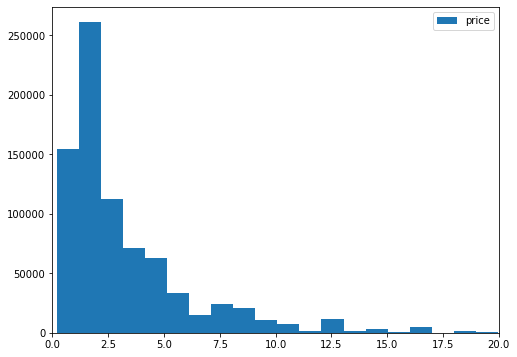

In [11]:
creat_histogram(df, 'price', 'price', 20, 20)

In [12]:
columns_to_show =['price']
pd.pivot_table(df, index = ['country'], values=columns_to_show, aggfunc='sum').sort_values('price', ascending=False).head(10).round(1)

,price
country,
United Kingdom,2402937.2
EIRE,45934.7
Germany,43505.6
France,30665.6
Netherlands,9847.9
Spain,7709.1
Belgium,7522.4
Switzerland,6667.5
Channel Islands,5058.2


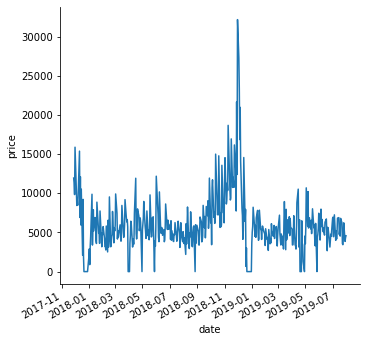

In [13]:
g = sns.relplot(x='date', y='price', data=df.groupby(pd.Grouper(key='date', freq='B')).sum().reset_index(), kind='line')
g.fig.autofmt_xdate()